In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
#Number of Rows
df.shape[0]

15509

In [4]:
#Number of Columns
df.shape[1]

10

In [5]:
print(df.columns.tolist())

['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
#Total Number of Missing Values
df.isnull().sum().values.sum()

33523

In [8]:
#Unique Values
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# #actors value count


In [10]:

df['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [11]:
# directors value count
df['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [12]:
#genre value count
df['Genre'].value_counts()


Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [13]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [15]:
# Predict movie ratings based on features, and remove null values from features
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes'], inplace=True)

In [16]:
df.isna().sum()


Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [17]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# #Dataset Overview after clearning null values

In [23]:
df.shape[0] #Number of rows


5851

In [24]:
df.shape[1] #Number of columns


10

In [25]:
df.isna().sum().values.sum()

387

In [26]:
df.nunique() #total number of unique values

Name        5570
Year          91
Duration     178
Genre        393
Rating        83
Votes       2030
Director    2549
Actor 1     2046
Actor 2     2373
Actor 3     2572
dtype: int64

In [27]:
# Remove ("-2019") parentheses from YEAR column and we will convert to INT
df['Year'] = df['Year'].str.strip('()').astype(int)

In [28]:
# Remove ("1,086") commas from Votes column and we will convert to INT
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

In [29]:
# Remove (109 min) min from Duration and we will convert to INT
df['Duration'] = df['Duration'].str.replace('min','').astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.3+ KB


In [31]:
df.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


# # Drop the Genre column


In [32]:
# Drop the Genre column
df.drop('Genre', axis=1, inplace=True)

In [33]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [34]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

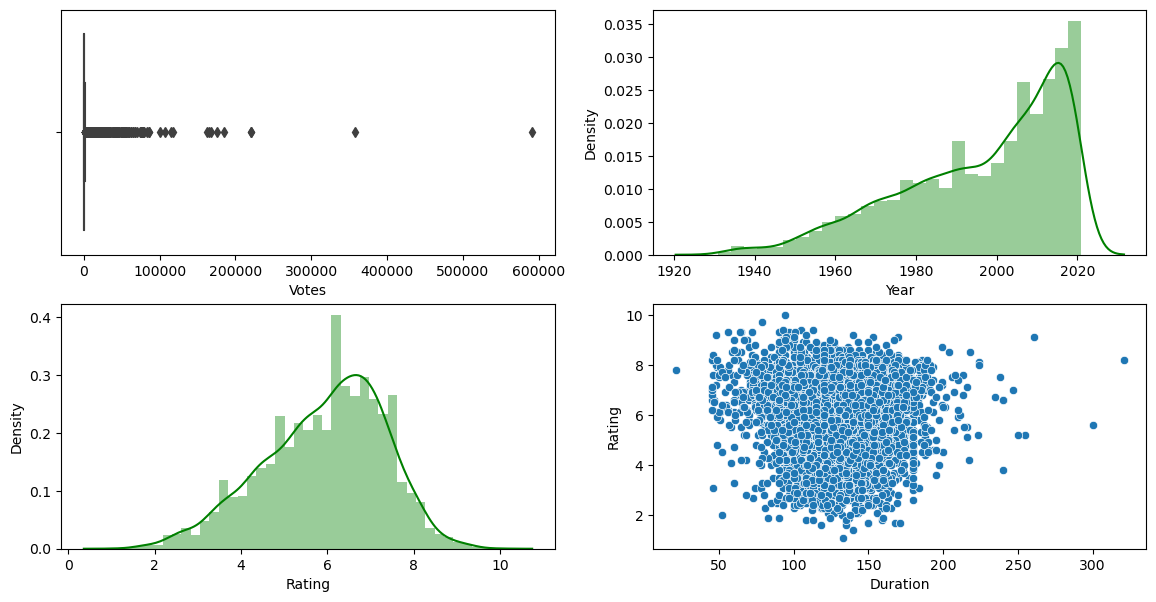

In [35]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.boxplot(x='Votes', data=df)

plt.subplot(2, 2, 2)
sns.distplot(df['Year'], color='g')

plt.subplot(2, 2, 3)
sns.distplot(df['Rating'], color='g')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Duration'], y=df['Rating'], data=df)

plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

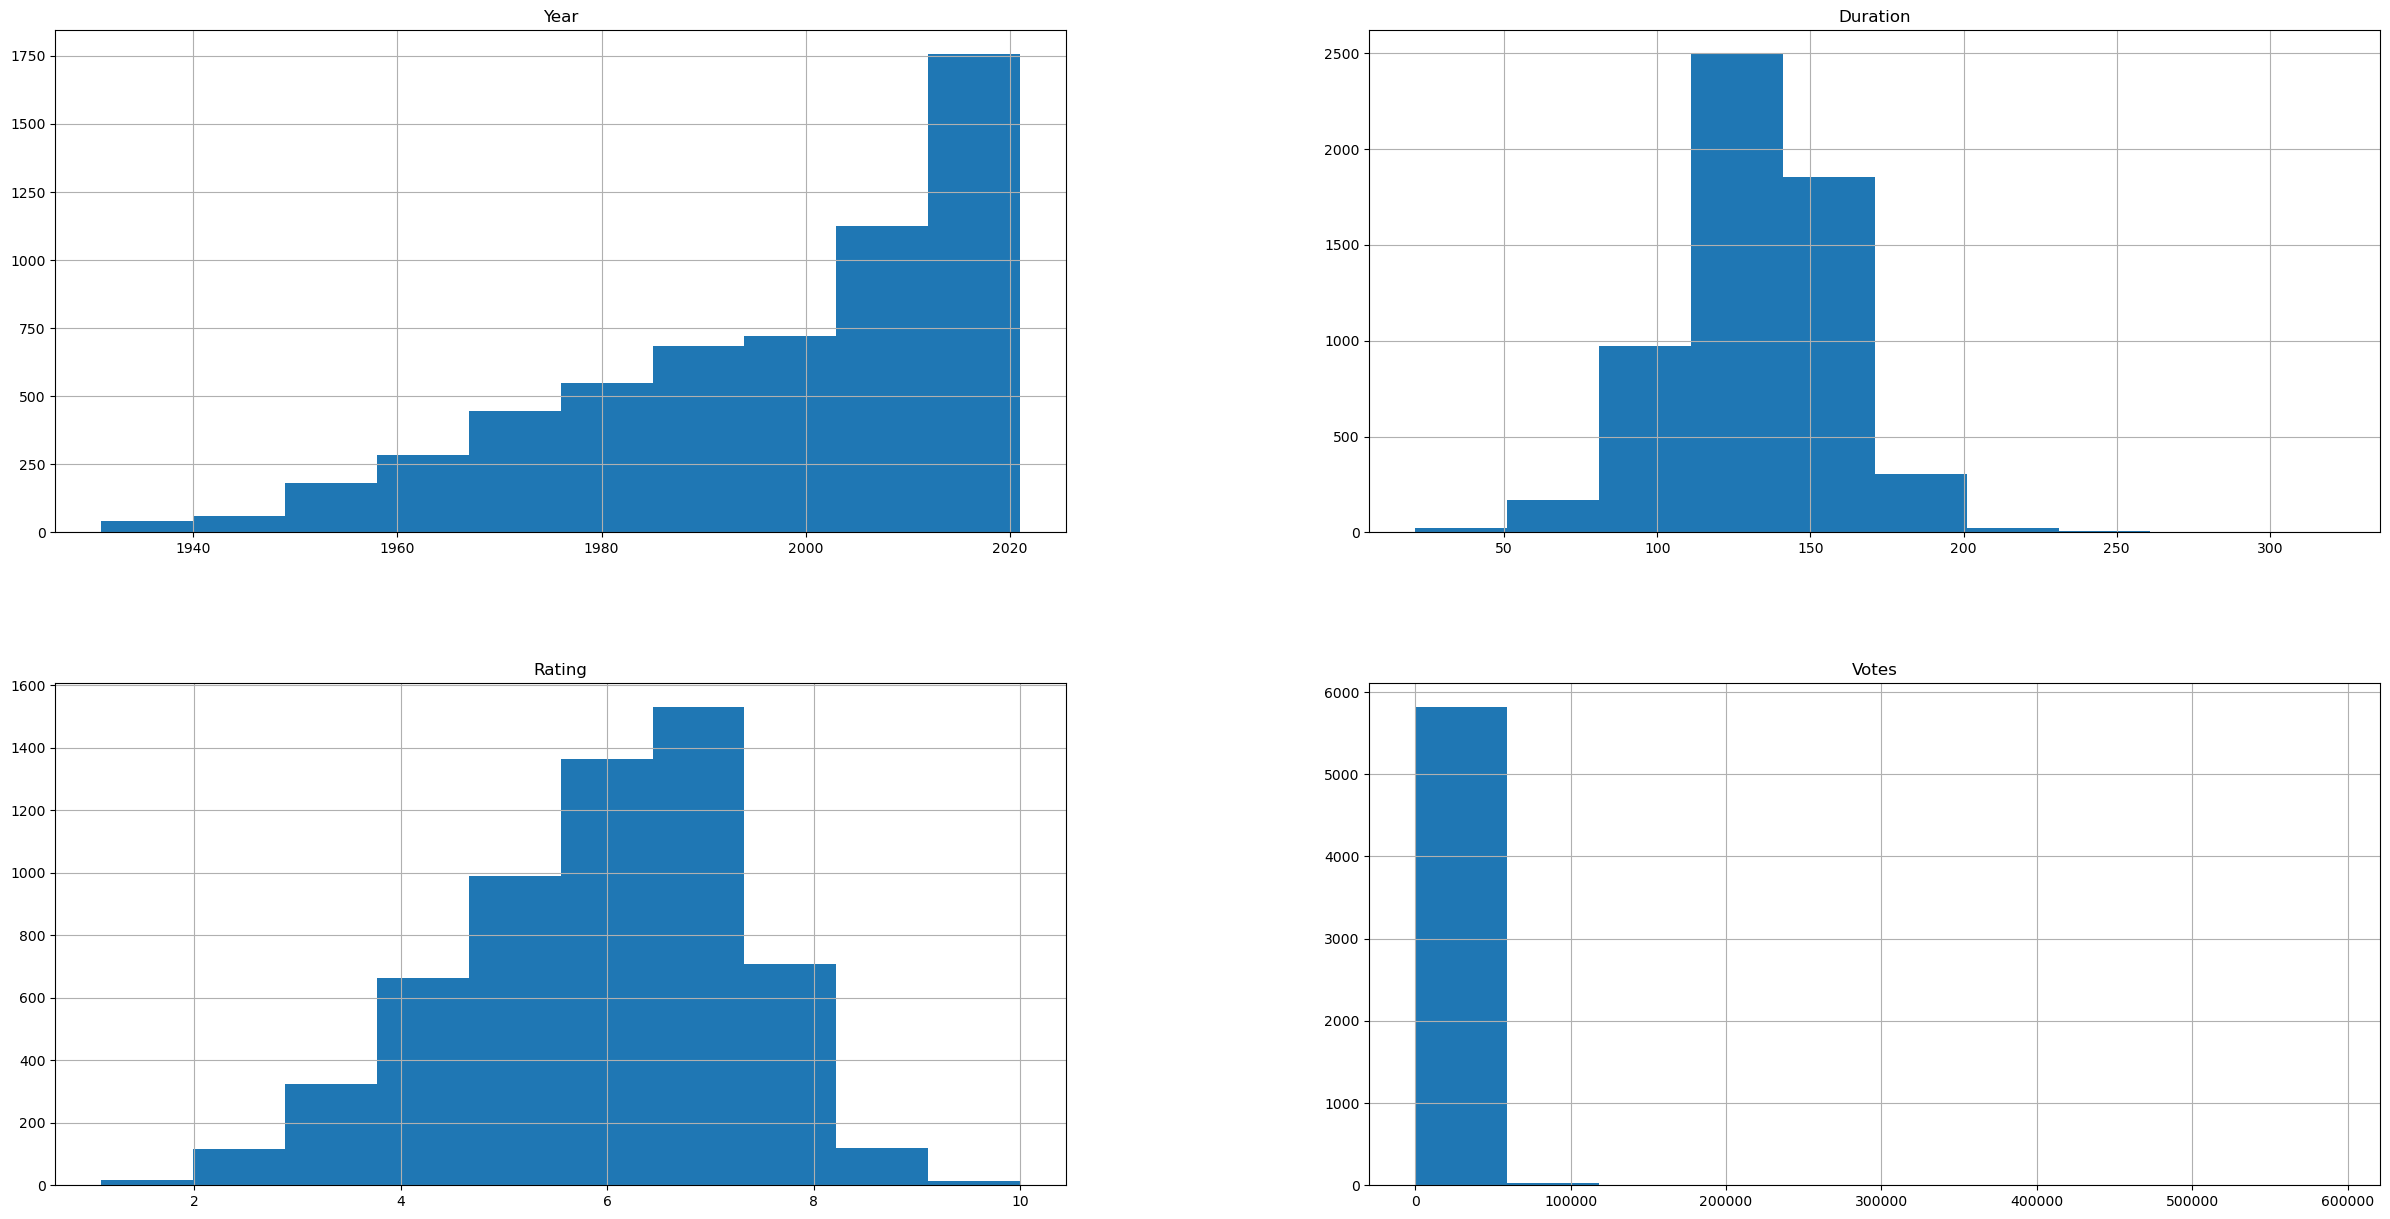

In [36]:
#Histogram
df.hist(figsize=(30, 15))

In [37]:
df.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [40]:
X = df[['Year','Duration','Votes']]
y = df['Rating']

In [41]:
X.head()


,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326


In [42]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [44]:
# Now we will split data into Training and Testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Building a Model

In [45]:
# Create a pipeline with SGDRegressor and standard scalling
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
pipeline = Pipeline([('Scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=1000, random_state=1000))])

In [47]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('Scaler', StandardScaler()),
                ('sgd', SGDRegressor(random_state=1000))])

In [48]:
# Now Predict ratings on the test set
y_pred_pipeline = pipeline.predict(X_test)


In [49]:
y_pred_pipeline

array([5.82466996, 6.57614536, 5.73319638, ..., 5.68570112, 5.81004424,
       5.87257446])

# Model Evaluation

In [51]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation Metrics for the Pipeline
mae_pipeline = mean_absolute_error(y_test, y_pred_pipeline)
mse_pipeline = mean_squared_error(y_test, y_pred_pipeline)
r2_pipeline = r2_score(y_test, y_pred_pipeline)

In [52]:
print("Pipeline Mean Absolute Error:", mae_pipeline)
print("Pipeline Mean Squared Error:", mse_pipeline)
print("Pipeline R-square:", r2_pipeline)

Pipeline Mean Absolute Error: 1.040142363499226
Pipeline Mean Squared Error: 1.75589466147756
Pipeline R-square: 0.037929023872087186


# Model Deployment


In [53]:

new_input = pd.DataFrame({'Year':[2022], 'Duration':[135], 'Votes':[10120]})

#Use trained pipeline to make predictons on the new_input
predicted_rating = pipeline.predict(new_input)
print("Predicted Rating:", predicted_rating)

Predicted Rating: [5.58974792]
